### Data Wrangling 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load data into Mdf and Pdf
Mdf = pd.read_csv('student-mat.csv',sep=';')
Pdf = pd.read_csv('student-por.csv',sep=';')

In [3]:
#Add a column "Subject" that describes which course the student has taken
Mdf['Subject'] = 'M'
Pdf['Subject'] = 'P'

In [4]:
#Identify students who took both Math and Portuguese classes
df = pd.merge(Mdf,Pdf,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], suffixes=('_M','_P'))

In [5]:
#In df, replace G3 with new_G3, average score of Math and Portuguese 
df.loc[:,'new_G3'] = (df.G3_M + df.G3_P)/2
#Merge df back with Mdf, so we have a dataset (Mdf4) for students who take math only and who take both classes
Mdf2 = df.drop(['guardian_P', 'traveltime_P',
       'studytime_P', 'failures_P', 'schoolsup_P', 'famsup_P', 'paid_P',
       'activities_P', 'higher_P', 'romantic_P', 'famrel_P', 'freetime_P',
       'goout_P', 'Dalc_P', 'Walc_P', 'health_P', 'absences_P', 'G1_P', 'G2_P',
       'G3_P', 'Subject_P'], axis=1)
Mdf2.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Subject', 'new_G3']
Mdf3 = pd.concat([Mdf, Mdf2])
Mdf3[['G3','new_G3']]
Mdf4 = Mdf3.drop_duplicates(['Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob', 'Pstatus',
       'Subject', 'Walc', 'absences', 'activities', 'address', 'age',
       'failures', 'famrel', 'famsize', 'famsup', 'freetime', 'goout',
       'guardian', 'health', 'higher', 'internet', 'nursery', 'paid',
       'reason', 'romantic', 'school', 'schoolsup', 'sex', 'studytime',
       'traveltime'], keep='last')
#For students taking two classes, update Subject value as "B"
Mdf4.Subject = np.where(Mdf4.new_G3.isnull(), Mdf4.Subject, 'B')
#For students only taking Math, the average score (new_G3) is their Math score (G3)
Mdf4.new_G3 = np.where(Mdf4.new_G3.isnull(), Mdf4.G3, Mdf4.new_G3)
#Drop G3
Mdf4 = Mdf4.drop('G3', axis=1)
#Rename new_G3 as G3
Mdf4 = Mdf4.rename(columns = {'new_G3':'G3'})

/Users/Jing/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
#Identify students who took Portuguese class only as Pdf4
#In df (students taking two classes), select columns coming from Pdf and rename columns
Pdf2 = df.drop(['guardian_M', 'traveltime_M', 'studytime_M',
       'failures_M', 'schoolsup_M', 'famsup_M', 'paid_M', 'activities_M',
       'higher_M', 'romantic_M', 'famrel_M',
       'freetime_M', 'goout_M', 'Dalc_M', 'Walc_M', 'health_M', 'absences_M',
       'G1_M', 'G2_M', 'G3_M', 'Subject_M'], axis=1)
Pdf2.columns = (['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'higher', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Subject', 'new_G3'])
#Merge Pdf2 back to Pdf, resulting students taking Portuguese class only, and students taking two classes (appeared twice)
#Fully drop duplicates (students taking two classes)
Pdf4 = pd.concat([Pdf, Pdf2]).drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep=False)
#Drop new_G3
Pdf4 = Pdf4.drop('new_G3', axis=1)

In [7]:
#Concatenate Mdf4 and Pdf4 as INPUTdf
#INPUTdf has unique student info per record/row
INPUTdf = pd.concat([Mdf4,Pdf4])
#Add a column "courses" that has the number of course the student has taken
INPUTdf['courses'] = np.where(INPUTdf['Subject'] == 'B', 2, 1)
#Add a variable "Aalc" measuring average alcohol daily consumption
INPUTdf.loc[:, 'Aalc'] = (INPUTdf['Dalc']*5 + INPUTdf['Walc']*2)/7
#Drop variables not interested
INPUTdf = INPUTdf.drop(['G1', 'G2', 'paid', 'Dalc', 'Walc'], axis=1)
INPUTdf.head()

,Fedu,Fjob,G3,Medu,Mjob,Pstatus,Subject,absences,activities,address,...,nursery,reason,romantic,school,schoolsup,sex,studytime,traveltime,courses,Aalc
128,2,other,0.0,2,services,T,M,0,yes,R,...,yes,reputation,no,GP,no,M,1,1,1,1.285714
161,2,other,7.0,3,other,T,M,6,no,R,...,yes,course,yes,GP,yes,M,2,2,1,1.857143
162,2,other,0.0,1,other,T,M,0,yes,U,...,yes,course,no,GP,no,M,1,2,1,2.571429
163,3,services,10.0,1,at_home,T,M,2,no,U,...,yes,course,no,GP,no,M,1,1,1,1.857143
165,2,services,12.0,3,services,T,M,16,yes,U,...,no,course,no,GP,no,M,1,2,1,1.000000


### Descriptive Analysis

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

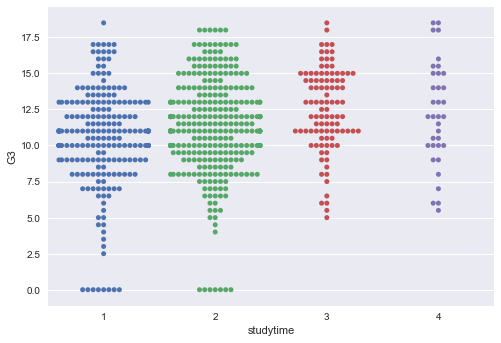

In [9]:
sns.swarmplot(x="studytime", y="G3", data=INPUTdf)

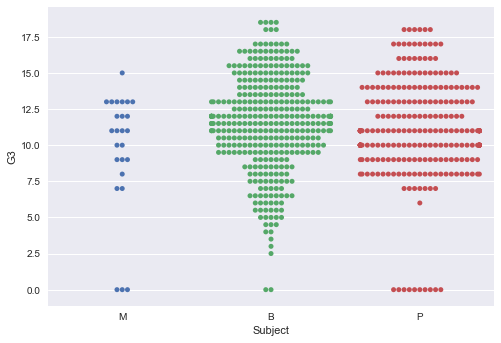

In [10]:
sns.swarmplot(x="Subject", y="G3", data=INPUTdf)

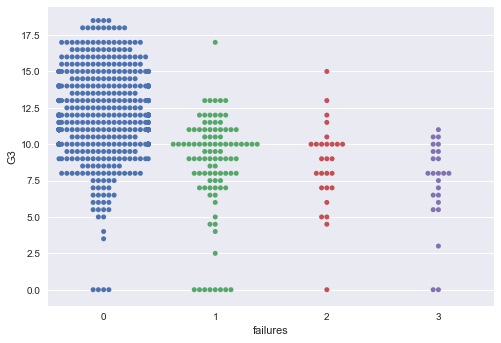

In [11]:
sns.swarmplot(x="failures", y="G3", data=INPUTdf)

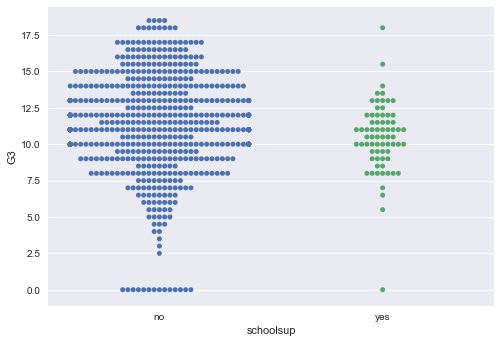

In [12]:
sns.swarmplot(x="schoolsup", y="G3", data=INPUTdf)

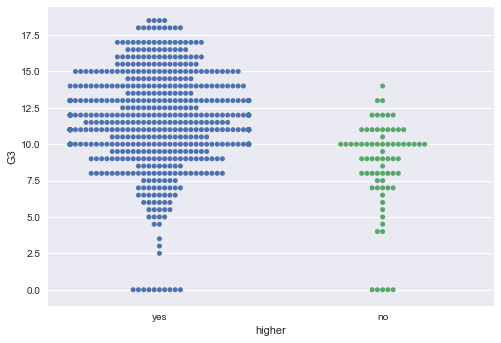

In [13]:
sns.swarmplot(x="higher", y="G3", data=INPUTdf)

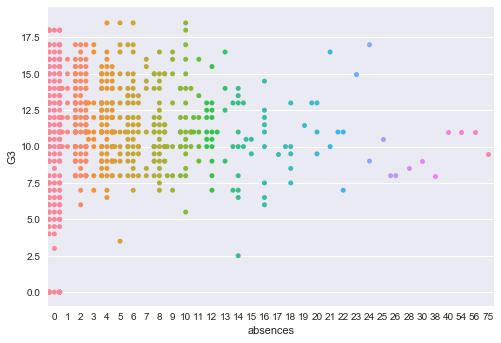

In [14]:
sns.swarmplot(x="absences", y="G3", data=INPUTdf)

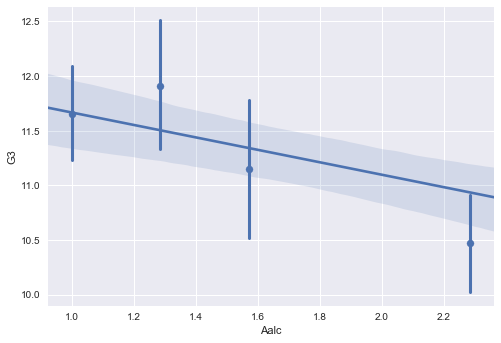

In [15]:
sns.regplot(x="Aalc", y="G3", data=INPUTdf, x_bins=4)

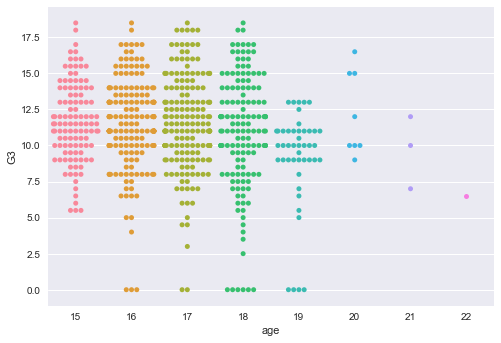

In [16]:
sns.swarmplot(x="age", y="G3", data=INPUTdf)

### Preprocessing

In [17]:
#Identify target variable (y) and predictor variables(X)
y = INPUTdf['G3']
X = INPUTdf[['Fedu', 'Fjob', 'Medu', 'Mjob', 'Pstatus', 'Subject', 'absences',
       'activities', 'address', 'age', 'failures', 'famrel', 'famsize',
       'famsup', 'freetime', 'goout', 'guardian', 'health', 'higher',
       'internet', 'nursery', 'reason', 'romantic', 'school', 'schoolsup',
       'sex', 'studytime', 'traveltime', 'courses', 'Aalc']]

In [18]:
# INPUTdf = pd.get_dummies(INPUTdf)
#From X, split category and non-category variables
catetory_vars = ['Fedu', 'Fjob', 'Medu', 'Mjob', 'Pstatus', 'Subject', 'absences',
       'activities', 'address', 'failures', 'famrel', 'famsize',
       'famsup', 'freetime', 'goout', 'guardian', 'health', 'higher',
       'internet', 'nursery', 'reason', 'romantic', 'school', 'schoolsup',
       'sex', 'studytime', 'traveltime', 'courses']
noncatetory_vars = ['age','Aalc']
# Dummy code categorical variables
X = pd.get_dummies(X, columns=catetory_vars)
X.head()

,age,Aalc,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Fjob_at_home,Fjob_health,Fjob_other,...,studytime_1,studytime_2,studytime_3,studytime_4,traveltime_1,traveltime_2,traveltime_3,traveltime_4,courses_1,courses_2
128,18,1.285714,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
161,15,1.857143,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
162,16,2.571429,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
163,17,1.857143,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
165,16,1.000000,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [19]:
#Split rawData into trainData and testData
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [20]:
#Split X_train and X_test into sub dataframes consists of dummy columns only and non-dummy columns only
X_train_nondummies = X_train.select_dtypes(exclude=['uint8'])
X_train_dummies = X_train.select_dtypes(exclude=['int64','float64'])
X_test_nondummies = X_test.select_dtypes(exclude=['uint8'])
X_test_dummies = X_test.select_dtypes(exclude=['int64','float64'])

In [21]:
#Center and scale non-dummy coded varialbes in training dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_nondummies)
X_train_nondummies_scaled = scaler.transform(X_train_nondummies)
#Convert dataframe X_train_dummies into numpy array X_train_dummies_np
X_train_dummies_np = X_train_dummies.values
#Concatenate scaled-nondummy and dummy variables as new training data X
X_train_new = np.concatenate((X_train_nondummies_scaled, X_train_dummies_np), axis=1)

In [22]:
#Using similar approach to process X_test datasets
#Transform test dataset
X_test_nondummies_scaled = scaler.transform(X_test_nondummies)
#Convert dataframe X_test_dummies into numpy array X_test_dummies_np
X_test_dummies_np = X_test_dummies.values
#Concatenate scaled-nondummy and dummy variables as new test data X_test_new
X_test_new = np.concatenate((X_test_nondummies_scaled, X_test_dummies_np), axis=1)

In [24]:
#Concatenate X_train_new and X_test_new as X_new
#X_new has scaled nondummy variables in X
X_new = np.concatenate((X_train_new, X_test_new))
X_new

array([[ 0.90569489,  0.65592632,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.12166051,  0.49489468,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.66237388, -0.79335851,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [-1.44640826,  2.5883061 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.25779804,  1.46108456,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.12166051, -0.47129521,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

### Modeling

In [25]:
from sklearn import svm
from sklearn import cross_validation
from sklearn import datasets
from sklearn.svm import SVR

/Users/Jing/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
svr_rbf = SVR(kernel='rbf', C=np.exp(-3), gamma=np.exp(-3))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.0510299940059 0.0376058908495 -0.0361561833231


In [27]:
svr_rbf = SVR(kernel='rbf', C=np.exp(-1), gamma=np.exp(-3))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.227084030337 0.163625826472 -0.0342134609106


In [28]:
svr_rbf = SVR(kernel='rbf', C=np.exp(0), gamma=np.exp(-3))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.40817552623 0.247023019772 -0.0393312016783


In [29]:
svr_rbf = SVR(kernel='rbf', C=np.exp(5), gamma=np.exp(-10))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.202228029493 0.193907253547 -0.0439090203653


In [30]:
svr_rbf = SVR(kernel='rbf', C=np.exp(10), gamma=np.exp(-3))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.999089289048 0.260524540253 -0.144442292797


In [31]:
svr_rbf = SVR(kernel='rbf', C=np.exp(50), gamma=np.exp(-3))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.999089289048 0.260524540253 -0.144442292797


In [32]:
svr_rbf = SVR(kernel='rbf', C=np.exp(1), gamma=np.exp(-1))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.734714750515 0.00722890045884 -0.0341784371687


In [33]:
svr_rbf = SVR(kernel='rbf', C=np.exp(1), gamma=np.exp(0))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.732484047131 -0.00186555657405 -0.0355476753251


In [34]:
svr_rbf = SVR(kernel='rbf', C=np.exp(1), gamma=np.exp(1))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.732478112903 -0.00195110284737 -0.0359590438777


In [35]:
svr_rbf = SVR(kernel='rbf', C=np.exp(1), gamma=np.exp(10))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.732479458217 -0.00195117273612 -0.0359692046986


In [36]:
svr_rbf = SVR(kernel='rbf', C=np.exp(10), gamma=np.exp(50))
y_rbf = svr_rbf.fit(X_train_new, y_train)
train_score = svr_rbf.score(X_train_new, y_train)
test_score = svr_rbf.score(X_test_new, y_test)
cross_score = cross_validation.cross_val_score(svr_rbf, X_new, y, cv=5)
print (train_score, test_score, cross_score.mean())

0.999081393386 -0.00512410328208 -0.0382044238363
